In [3]:
%pip install huffman


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import huffman
import math

symbol_freq_pairs = [('A', 200), ('B', 434), ('C', 11), ('D', 321), ('E', 0)]

codebook = huffman.codebook(symbol_freq_pairs)

total_frequency = sum(freq for _, freq in symbol_freq_pairs)
ent = 0
avg_len = 0

for symbol, freq in symbol_freq_pairs:
    if freq > 0:
        p = freq / total_frequency
        ent -= p * math.log2(p)
        avg_len += len(codebook[symbol]) * p

eff = ent / avg_len if avg_len > 0 else 0

print("Huffman Codes:")
for symbol, code in codebook.items():
    print(f"Symbol: {symbol}, Code: {code}")

print("\nEntropy:", ent)
print("Average Codeword Length:", avg_len)
print("Efficiency:", eff)


Huffman Codes:
Symbol: A, Code: 101
Symbol: B, Code: 0
Symbol: C, Code: 1001
Symbol: D, Code: 11
Symbol: E, Code: 1000

Entropy: 1.5907012359712613
Average Codeword Length: 1.7805383022774328
Efficiency: 0.8933822057838595


In [4]:
import heapq

class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''

    def __lt__(self, other):
        return self.freq < other.freq

def print_nodes(node, val=''):
    newVal = val + str(node.huff)

    if node.left:
        print_nodes(node.left, newVal)
    if node.right:
        print_nodes(node.right, newVal)

    if not node.left and not node.right:
        print(f"{node.symbol} = {newVal}")

chars = ['a', 'b', 'c', 'd', 'e', 'f']
freq = [5, 9, 12, 13, 16, 45]
total_freq = sum(freq)  # Calculate total frequency
nodes = []

for x in range(len(chars)):
    heapq.heappush(nodes, Node(freq[x], chars[x]))

while len(nodes) > 1:
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    left.huff = '0'
    right.huff = '1'

    new_node = Node(left.freq + right.freq, left.symbol + right.symbol, left, right)
    heapq.heappush(nodes, new_node)

huffman_tree_root = nodes[0]
print_nodes(huffman_tree_root)

# Calculate compression ratio
original_bits = total_freq * 8  # Assuming each character is 8 bits
compressed_bits = len(chars) * len(freq) + len(huffman_tree_root.huff) * total_freq
compression_ratio = original_bits / compressed_bits
print(f"Compression Ratio: {compression_ratio:.2f}")


f = 0
c = 100
d = 101
a = 1100
b = 1101
e = 111
Compression Ratio: 22.22


Compression Ratio: 2.4269334209758875


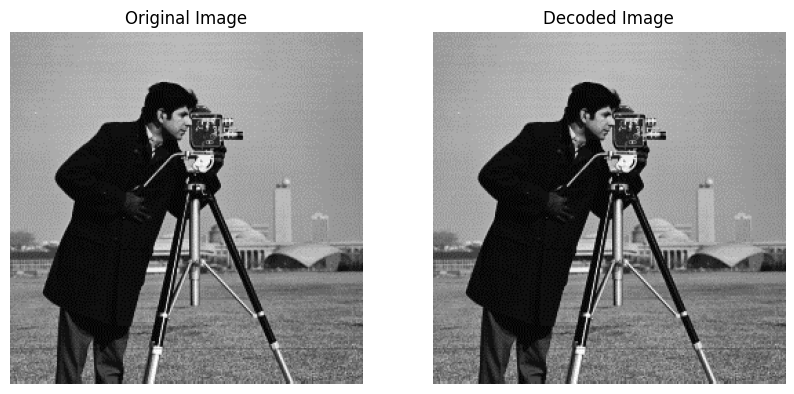

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import huffman

img = cv2.imread("Original-cameraman-image.png", 0)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Create a list of tuples where the first element is the symbol and the second element is the frequency
symbol_freq_pairs = [(str(i), hist[i]) for i in range(len(hist))]

# Build the Huffman tree
codebook = huffman.codebook(symbol_freq_pairs)

encoded_image = ""
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        encoded_image += codebook[str(img[i, j])]

decoded_image = np.zeros_like(img)
current_index = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for symbol, code in codebook.items():
            if encoded_image[current_index:current_index + len(code)] == code:
                decoded_image[i, j] = int(symbol)
                current_index += len(code)
                break

original_bits = img.shape[0] * img.shape[1] * 8
compressed_bits = len(encoded_image)
compression_ratio = original_bits / compressed_bits

print("Compression Ratio:", compression_ratio)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(decoded_image, cmap="gray")
plt.title("Decoded Image")
plt.axis("off")

plt.show()
